# House Price Prediction With a Multiple Variable Linear Regression

This notebook explores a simple linear regression model using multiple variables as features to predict the target of house prices based on numerical features. The project focuses on understanding the full machine learning workflow, from data inspection to model evaluation.

**Goal:** Predict house prices using multiple variable linear regression  
**Tools:** Python, pandas, scikit-learn, matplotlib


### Import Necessary Tools & Libraries

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Load the Dataset

In [36]:
df = pd.read_csv("Housing_Price_Data.csv")

### Inspect Data

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [38]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [39]:
X = df[['area','bedrooms', 'bathrooms', 'stories', 'parking']]
y = df['price']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Create The Model

In [40]:
model = LinearRegression()

### Train The Model (Fit it)

In [41]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Feature Importance by Coefficient Comparison

The coefficients indicate how much each feature contributes to the predicted house price while holding other variables constant.
Features with larger absolute coefficients have a stronger influence on price, while features with coefficients near zero contribute less to the model.

<Axes: title={'center': 'Feature Coefficients'}>

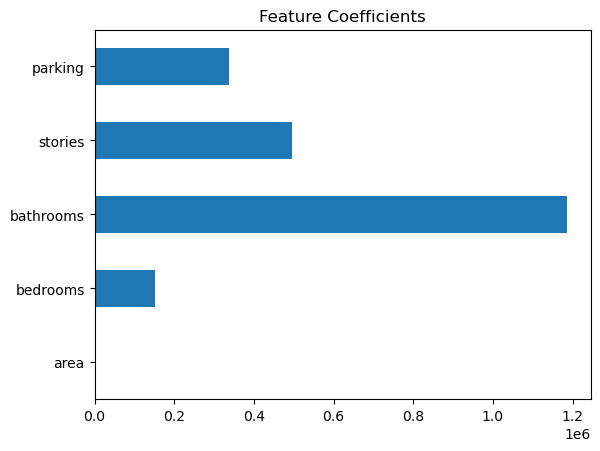

In [42]:
coefficients = pd.Series(
    model.coef_,
    index=X.columns
)

coefficients.sort_values(ascending=False)

# Visualize the Coefficiants via a Bar Graph
coefficients.plot(kind='barh', title='Feature Coefficients')



### Create a Refined Feature Set

In [43]:
X_refined = df[['bathrooms', 'stories', 'parking']]
y = df['price']

### Split Train/Test Data

In [44]:
X = df[['bathrooms', 'stories', 'parking']]
y = df['price']    

X_train_refined, X_test_refined, y_train_refined, y_test_refined = train_test_split(X_refined, y, test_size = 0.2, random_state = 42)

### Create and Fit a Refined Model

In [45]:
model_refined = LinearRegression()
model_refined.fit(X_refined, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Make Predictions With Refined Model

In [46]:
y_pred_refined = model_refined.predict(X_test_refined)


### Create a Predictions DataFrame

In [47]:
predictions_multi = X_test_refined.copy()

predictions_multi["actual_price"] = y_test_refined.values
predictions_multi["predicted_price"] = y_pred_refined


### Save to CSV

In [48]:
predictions_multi.to_csv("multi_variable_predictions.csv", index=False)

### Evaluate The Model

In [49]:
mse_multi = mean_squared_error(y_test, y_pred_refined)
r2_multi = r2_score(y_test, y_pred_refined)

print("Mean Squared Error (MSE):", mse_multi)
print("R² Score:", r2_multi)


Mean Squared Error (MSE): 2861002989705.14
R² Score: 0.4339770049163696
